In [ ]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


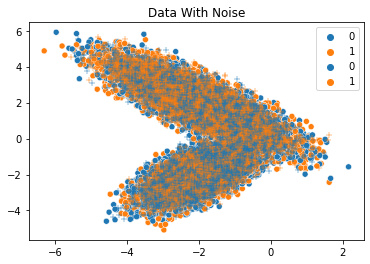

In [ ]:
X ,y = make_classification(n_samples=100000, # число примеров
                          n_features=2, # число признаков (атрибутов)
                          n_informative=2, # из них информативных
                          n_redundant=0, # из них не информативных
                          n_repeated=0, # из них повторяющихся
                          n_classes=2, # число классов
                          n_clusters_per_class=1, # число кластеров на класс
                          class_sep=2, # влияет на расстояние между кластерами
                          flip_y=0.9, # 0.2 доля ошибок (шума)
                          weights=[0.5,0.5], # пропорции числа данных в классах
                          random_state=17) # 
# разделяем на обучающие и тестовые, случайно
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# рисуем данные
plt.subplots();
ax1=plt.gca();
sns.scatterplot(X_train[:,0],X_train[:,1],hue=y_train,ax=ax1);# обучающие
sns.scatterplot(X_test[:,0],X_test[:,1],hue=y_test,ax=ax1,marker="+");# тестовые

ax1.set_title("Data With Noise");#
plt.show();

0.5484545454545454


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


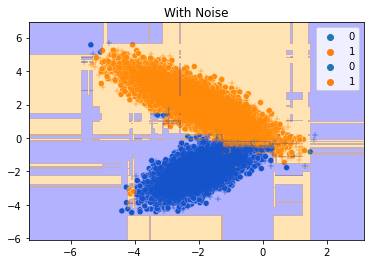

In [ ]:
# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# 5 максимальная глубина дерева
                             n_estimators=20,# 10 число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем 

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

ind=y_test==y_pred; # индексы совпадений результата классификации и меток классов

plt.subplots(); 
ax2=plt.gca();
# рисуем "правильно" распознанные примеры
sns.scatterplot(X_test[ind,0],X_test[ind,1],hue=y_test[ind],ax=ax2);
# рисуем "неправильно" распознанные примеры
sns.scatterplot(X_test[~ind,0],X_test[~ind,1],hue=y_pred[~ind],ax=ax2,marker="+");
#sns.scatterplot(X_test[:,0],X_test[:,1],hue=y_test[:],ax=ax2,marker="+");

ax2.set_title("With Noise");

# считаем и рисуем разделяющую поверхность.
plot_step=0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # немного измененные минимальное и максимальые значения превого атрибута 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # немного измененные минимальное и максимальые значения второго атрибута 
# считаем прямоугольную сетку возможных значений этих атрибутов
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), #
                     np.arange(y_min, y_max, plot_step)) #
  
# считаем выход классификатора для всех примеров сетки
# не забыв что массивы данных нужно привести к требуемому размеру.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) # и преобразуем обратно в исходному размеру

# рисуем разделяющую поверхность
cs = plt.contourf(xx, yy, Z, levels=1, colors=['blue','orange'],alpha=0.3) # рисуем контурную карту
plt.show();

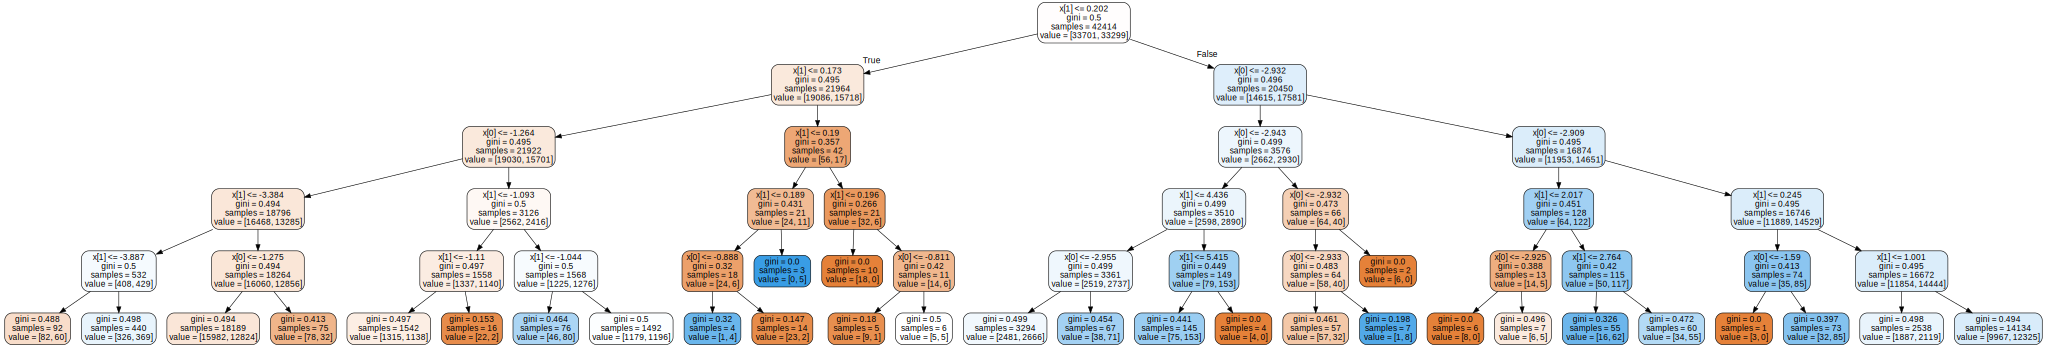

In [ ]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране
